<a href="https://colab.research.google.com/github/naga-sk/DataScienceTraining-Assignments/blob/main/naive_bayes/Naive_Bayes_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/nursnaaz/DataSciencewithPractical/main/07.%20Naive%20Bayes/diabetes.csv")

In [ ]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,NaN,NaN,NaN,3.845052,3.369578,0.0,1.0,3.0,6.0,17.0
Plasma glucose concentration,768.0,NaN,NaN,NaN,120.894531,31.972618,0.0,99.0,117.0,140.25,199.0
Diastolic blood pressure,768.0,NaN,NaN,NaN,69.105469,19.355807,0.0,62.0,72.0,80.0,122.0
Triceps skin fold thickness,768.0,NaN,NaN,NaN,20.536458,15.952218,0.0,0.0,23.0,32.0,99.0
2-Hour serum insulin,768.0,NaN,NaN,NaN,79.799479,115.244002,0.0,0.0,30.5,127.25,846.0
Body mass index,768.0,NaN,NaN,NaN,31.992578,7.88416,0.0,27.3,32.0,36.6,67.1
Diabetes pedigree function,768.0,NaN,NaN,NaN,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,NaN,NaN,NaN,33.240885,11.760232,21.0,24.0,29.0,41.0,81.0
Class variable,768,2,NO,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prm = df.iloc[:,:-1]

In [ ]:
prm.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
cls = df.iloc[:,-1]

In [ ]:
cls.head()

0    YES
1     NO
2    YES
3     NO
4    YES
Name:  Class variable, dtype: object

In [ ]:
# Input parameters
# prm = parameters are the independent variable
# cls = classification is the dependent variable or the outcome
# test_size = .3 indicates that 30% will be the test volume and 70% will be the train volume
# random_state = arbitrary argument which fixes the random sampling within the input dataset
# Output
# x_train = 70% of the independent variables
# x_test = 30% of the indepenent variables
# y_train = 70% of the outcome
# y_test = 30% of the outcome

x_train, x_test, y_train, y_test = train_test_split(prm, cls, test_size=.3, random_state=1)

In [ ]:
x_train.shape

(537, 8)

In [ ]:
x_test.shape

(231, 8)

In [ ]:
y_test.value_counts()

NO     146
YES     85
Name:  Class variable, dtype: int64

In [ ]:
x_train.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [ ]:
model = GaussianNB()

In [ ]:
# Fit the test data within the Gaussian Naive Bayes 
model.fit(x_train, y_train)

GaussianNB()

In [ ]:
#y_pred_train = model.predict(x_train)

In [ ]:
y_pred_test = model.predict(x_test)

In [ ]:
y_pred_test

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       '

In [ ]:
y_test

285     NO
101     NO
581     NO
352     NO
726     NO
      ... 
241     NO
599     NO
650     NO
11     YES
214    YES
Name:  Class variable, Length: 231, dtype: object

In [ ]:
#accuracy_score(y_pred_train, y_train)

0.7616387337057728

In [ ]:
accuracy_score(y_pred_test, y_test)

0.7835497835497836

In [ ]:
#confusion_matrix(y_pred_train, y_train)

array([[298,  72],
       [ 56, 111]])

In [ ]:
confusion_matrix(y_pred_test, y_test)

array([[128,  32],
       [ 18,  53]])

In [ ]:
print(classification_report(y_pred_train, y_train))

              precision    recall  f1-score   support

          NO       0.84      0.81      0.82       370
         YES       0.61      0.66      0.63       167

    accuracy                           0.76       537
   macro avg       0.72      0.74      0.73       537
weighted avg       0.77      0.76      0.76       537



In [ ]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

          NO       0.88      0.80      0.84       160
         YES       0.62      0.75      0.68        71

    accuracy                           0.78       231
   macro avg       0.75      0.77      0.76       231
weighted avg       0.80      0.78      0.79       231



In [ ]:
from yellowbrick.classifier import ConfusionMatrix


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


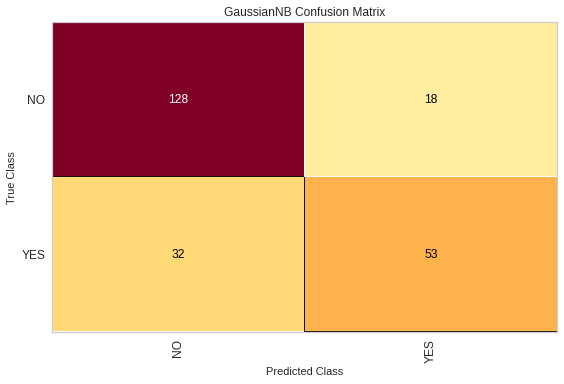

In [ ]:
cm = ConfusionMatrix(model, classes=['NO','YES'])
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)
cm.show()
